In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
560,2014,JAGUAR,XJL SUPERCHARGED,FULL-SIZE,5.0,8,AS8,E,20.6,13.6,17.5,16,280
943,2014,SUBARU,BRZ,MINICOMPACT,2.0,4,M6,Z,11.0,7.9,9.6,29,221
706,2014,MAZDA,MAZDA3 4-DOOR (i-ELOOP),COMPACT,2.5,4,AS6,X,8.3,6.1,7.3,39,168
428,2014,FORD,TRANSIT CONNECT,SPECIAL PURPOSE VEHICLE,1.6,4,AS6,X,10.8,8.0,9.5,30,218
355,2014,FORD,EDGE AWD,SUV - SMALL,3.7,6,AS6,X,13.7,10.4,12.2,23,281


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
139,3.0,6,12.1,278
148,2.4,4,8.2,189
911,5.7,8,15.4,354
98,2.0,4,8.8,202
392,1.6,4,7.6,175
193,6.2,8,16.6,382
974,1.8,4,7.1,163
792,1.6,4,8.3,191
561,5.0,8,13.3,306


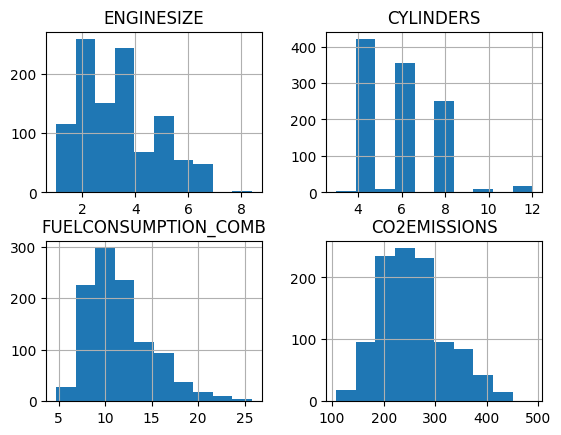

In [7]:
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

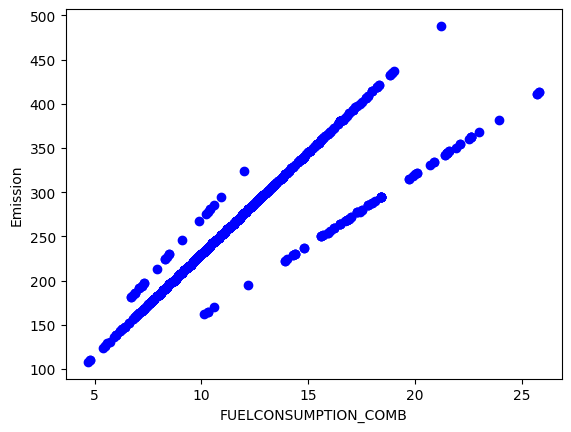

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS ,color = 'blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

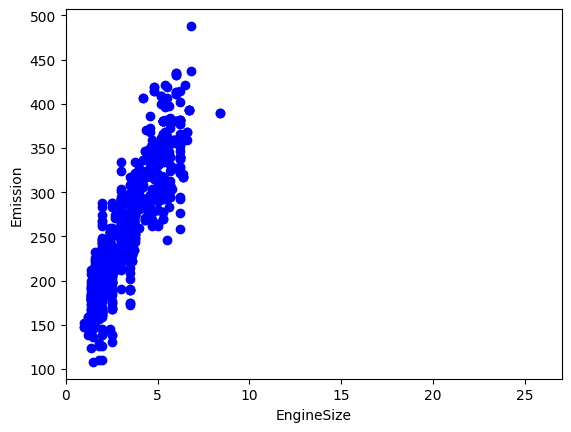

In [14]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color = 'blue')
plt.xlabel("EngineSize")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

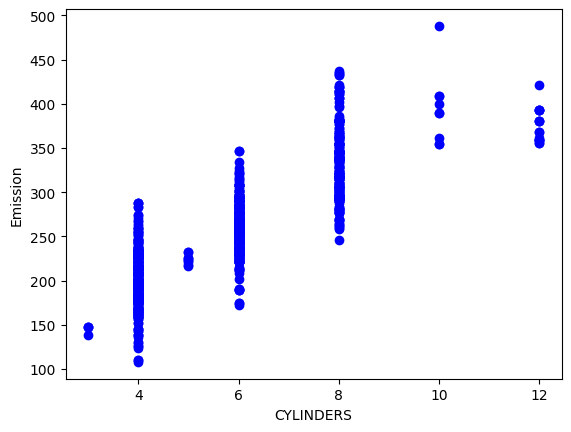

In [15]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color = 'blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

In [16]:
X = cdf.ENGINESIZE.to_numpy()
Y = cdf.CO2EMISSIONS.to_numpy()

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [22]:
type(X_train),np.shape(X_train),np.shape(X_test)

(numpy.ndarray, (853,), (214,))

In [23]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()

regressor.fit(X_train.reshape(-1,1),Y_train)

print('Coefficients : ',regressor.coef_[0])
print('Intercept : ',regressor.intercept_)

Coefficients :  38.992978724434046
Intercept :  126.2897021740873


TypeError: show() takes from 0 to 2 positional arguments but 3 were given

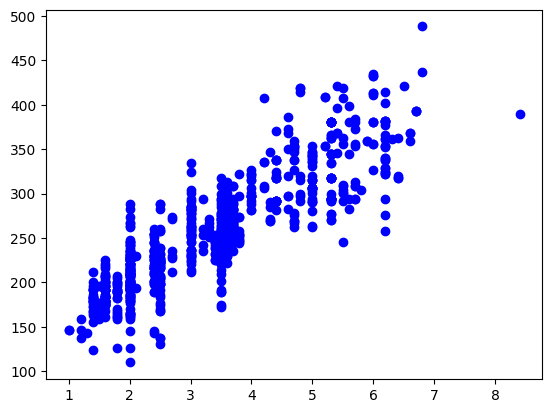

In [27]:
plt.scatter(X_train,Y_train,color = 'blue')
plt.show(X_train,regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("EngineSize")
plt.ylabel("Emission")

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Y_pred = regressor.predict(X_test.reshape(-1,1))

print("Mean absolute error: %.2f"%mean_absolute_error(Y_test,Y_pred))
print("Mean squared error: %2f"% mean_squared_error(Y_test,Y_pred))
print("Root mean squared error: %.2f"% np.sqrt(mean_absolute_error(Y_test,Y_pred)))
print("R2-score: %.2f"%r2_score(Y_test,Y_pred))


Mean absolute error: 24.10
Mean squared error: 985.938169
Root mean squared error: 4.91
R2-score: 0.76
